Hola **Pia**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
# Configuración para gráficos
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
# Mostrar algunas filas del dataframe para inspeccionar los datos
print(df_reviews.head())

      tconst title_type primary_title original_title  start_year end_year  \
0  tt0068152      movie             $              $        1971       \N   
1  tt0068152      movie             $              $        1971       \N   
2  tt0313150      short          '15'           '15'        2002       \N   
3  tt0313150      short          '15'           '15'        2002       \N   
4  tt0313150      short          '15'           '15'        2002       \N   

  runtime_minutes  is_adult              genres  average_rating  votes  \
0             121         0  Comedy,Crime,Drama             6.3   2218   
1             121         0  Comedy,Crime,Drama             6.3   2218   
2              25         0  Comedy,Drama,Short             6.3    184   
3              25         0  Comedy,Drama,Short             6.3    184   
4              25         0  Comedy,Drama,Short             6.3    184   

                                              review  rating   sp  pos  \
0  The pakage impl

In [6]:
# Verificar la estructura del dataframe (nombres de columnas y tipos de datos)
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
# Verificar valores faltantes
print(df_reviews.isnull().sum())

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga de datos y la exploración inicial!
</div>

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

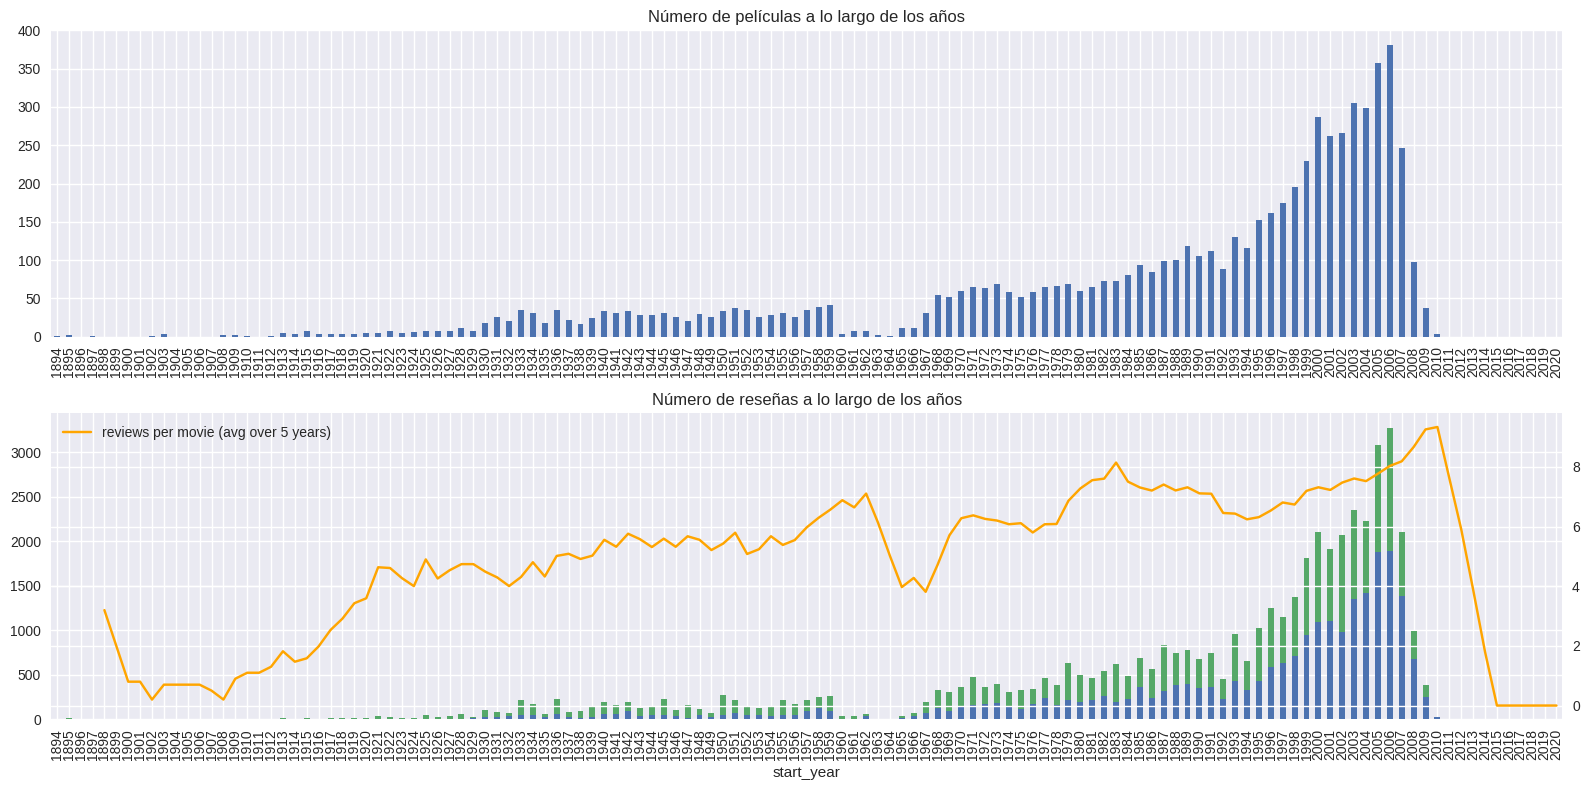

In [8]:
# 1. Número de películas y reseñas a lo largo de los años
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

# Gráfico 1: Número de películas por año
ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()

# Gráfico 1: Número de películas por año
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

# Gráfico 2: Número de reseñas por año (negativas y positivas)
ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()

# Rellenar los años que faltan con ceros
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)
dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

# Gráfico 3: Promedio de reseñas por película en los últimos 5 años
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx() # Crear eje y secundario
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

# Agregar leyenda y título
lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()
plt.show()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

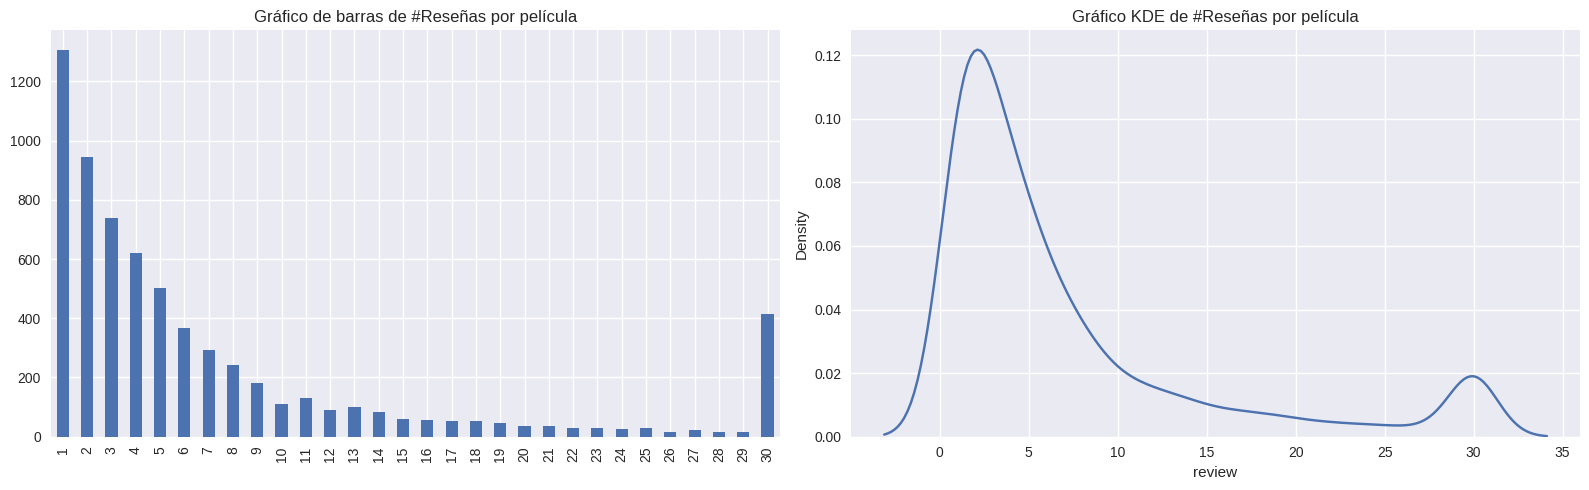

In [9]:
# 2. Distribución del número de reseñas por película (gráfico de barras y KDE)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de barras del número de reseñas por película
ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

# Gráfico KDE del número de reseñas por película
ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()
plt.show()

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

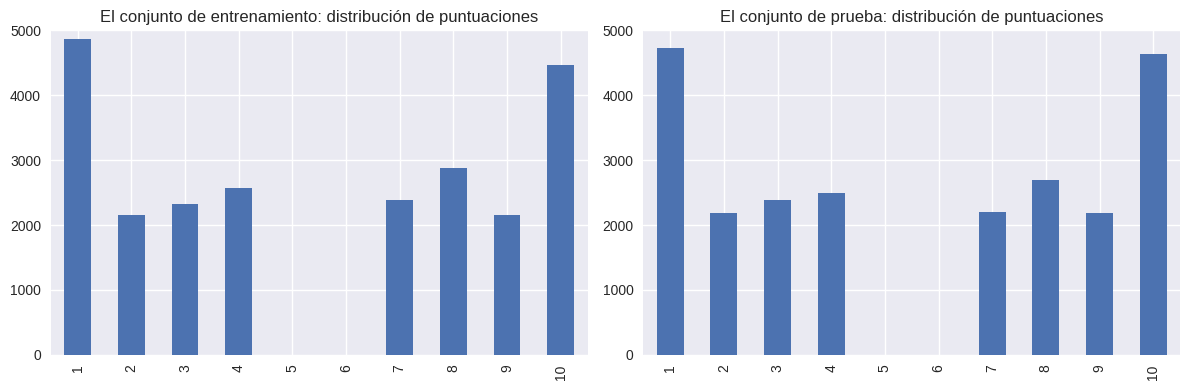

In [11]:
# 3. Distribución de puntuaciones en los conjuntos de entrenamiento y prueba
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Distribución de puntuaciones en el conjunto de entrenamiento
ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

# Distribución de puntuaciones en el conjunto de prueba
ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()
plt.show()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

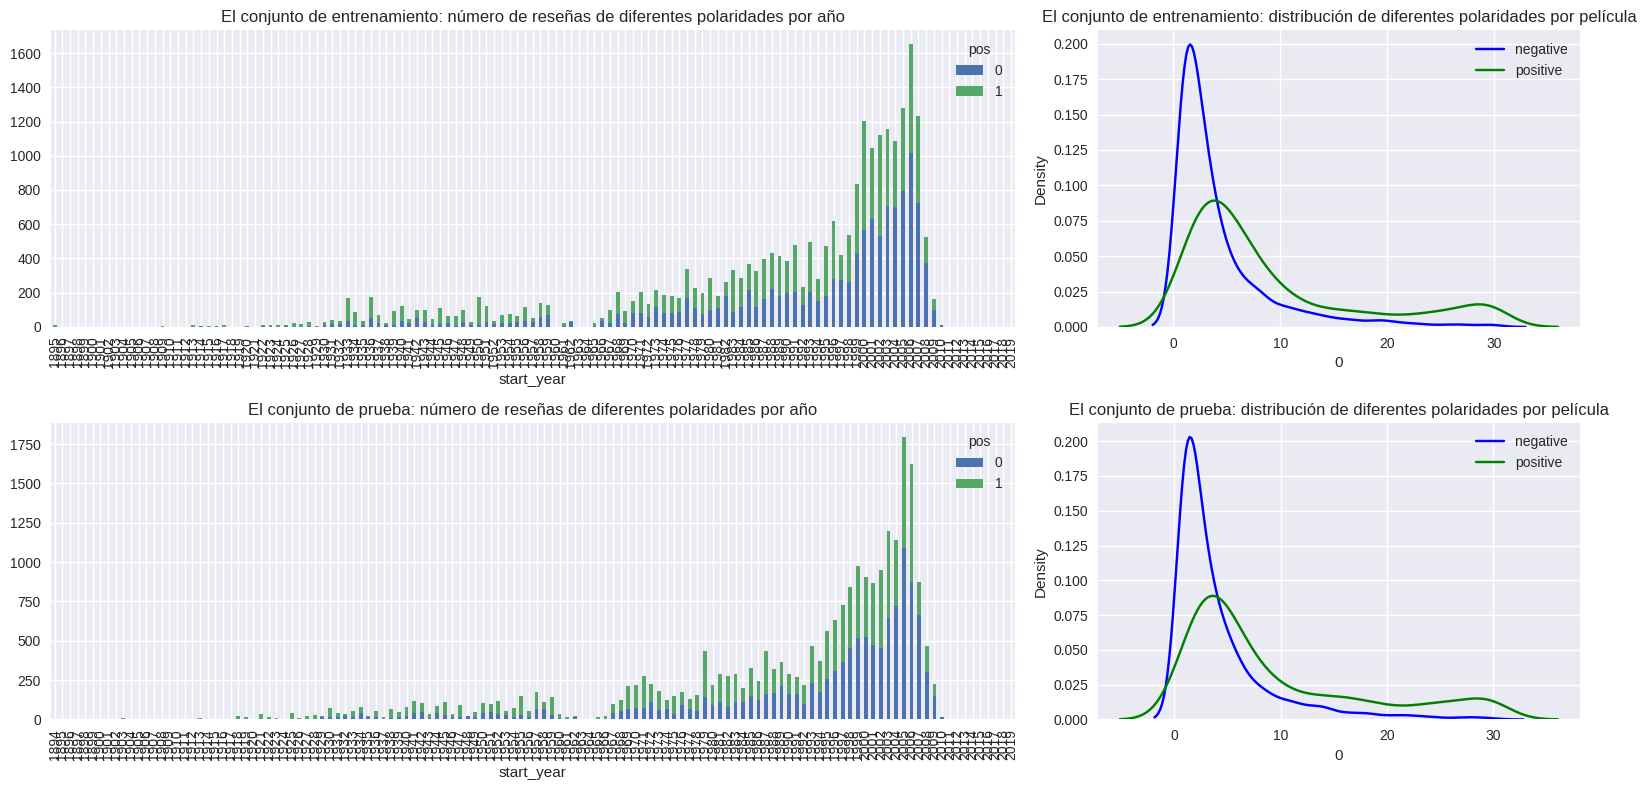

In [12]:
# 4. Distribución de reseñas negativas y positivas a lo largo de los años
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

# Gráfico 1: Número de reseñas negativas y positivas en el conjunto de entrenamiento
ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

# Gráfico 2: Distribución de reseñas negativas y positivas por película en el conjunto de entrenamiento
ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

# Gráfico 3: Número de reseñas negativas y positivas en el conjunto de prueba
ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

# Gráfico 4: Distribución de reseñas negativas y positivas por película en el conjunto de prueba
ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Recuerda que el EDA es para entender mejor nuestros datos, por lo que te recomendaría redactar conclusiones un poco más detalladas y hacer un poco de referencia a como podría afectar a los modelos
</div>

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [13]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    # Evaluar tanto en entrenamiento como en prueba
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
        # Predecir etiquetas y probabilidades
        pred_target = model.predict(features)  # Etiquetas predichas
        pred_proba = model.predict_proba(features)[:, 1]  # Probabilidades
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc
        
        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'
        
        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score')
        
        # ROC Curve
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC Curve
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        
        
        # Calcular la exactitud usando las etiquetas predichas
        eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    # Crear DataFrame con las métricas finales
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return


## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [14]:
import re

# Función para normalizar el texto: convertir a minúsculas, eliminar dígitos y caracteres especiales
def normalize_text(text):
    # Convertir todo a minúsculas
    text = text.lower()
    # Eliminar dígitos y signos de puntuación
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Aplicar la función de normalización a la columna de reseñas
df_reviews['review_norm'] = df_reviews['review'].apply(normalize_text)

# Verificar las primeras filas para ver cómo quedan las reseñas normalizadas
print(df_reviews[['review', 'review_norm']].head())


                                              review  \
0  The pakage implies that Warren Beatty and Gold...   
1  How the hell did they get this made?! Presenti...   
2  There is no real story the film seems more lik...   
3  Um .... a serious film about troubled teens in...   
4  I'm totally agree with GarryJohal from Singapo...   

                                         review_norm  
0  the pakage implies that warren beatty and gold...  
1  how the hell did they get this made presenting...  
2  there is no real story the film seems more lik...  
3  um  a serious film about troubled teens in sin...  
4  im totally agree with garryjohal from singapor...  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Realizaste un buen trabajo con la normalización 

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [15]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Trabajar con modelos

### Modelo 0 - Constante

           train  test
Exactitud    0.5   0.5
F1           0.0   0.0
APS          0.5   0.5
ROC AUC      0.5   0.5


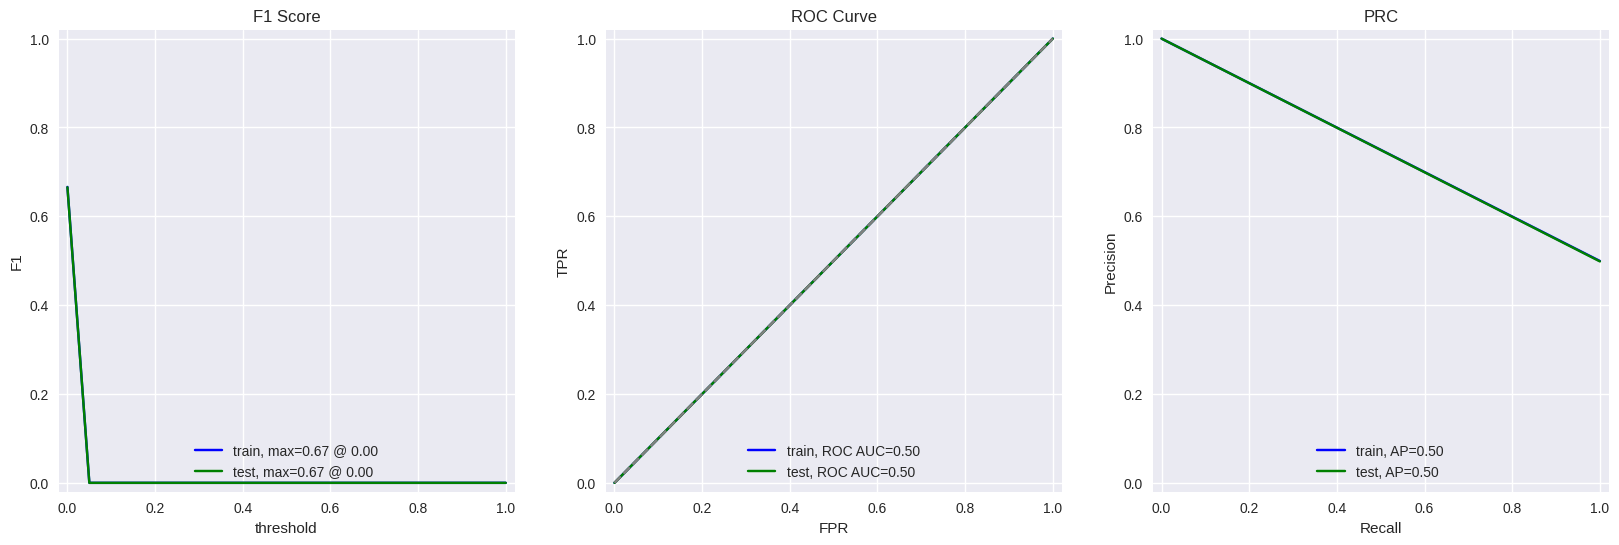

In [16]:
from sklearn.dummy import DummyClassifier

# Crear un modelo constante (baseline)
model_0 = DummyClassifier(strategy='most_frequent')

# Entrenar el modelo constante
model_0.fit(train_target.values.reshape(-1, 1), train_target)

# Evaluar el modelo constante en el conjunto de prueba
evaluate_model(model_0, train_target.values.reshape(-1, 1), train_target, test_target.values.reshape(-1, 1), test_target)


### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


F1 Score del Modelo 1: 0.88
El Modelo 1 alcanzó el umbral de F1 ≥ 0.85
           train  test
Exactitud   0.92  0.88
F1          0.92  0.88
APS         0.97  0.95
ROC AUC     0.97  0.95


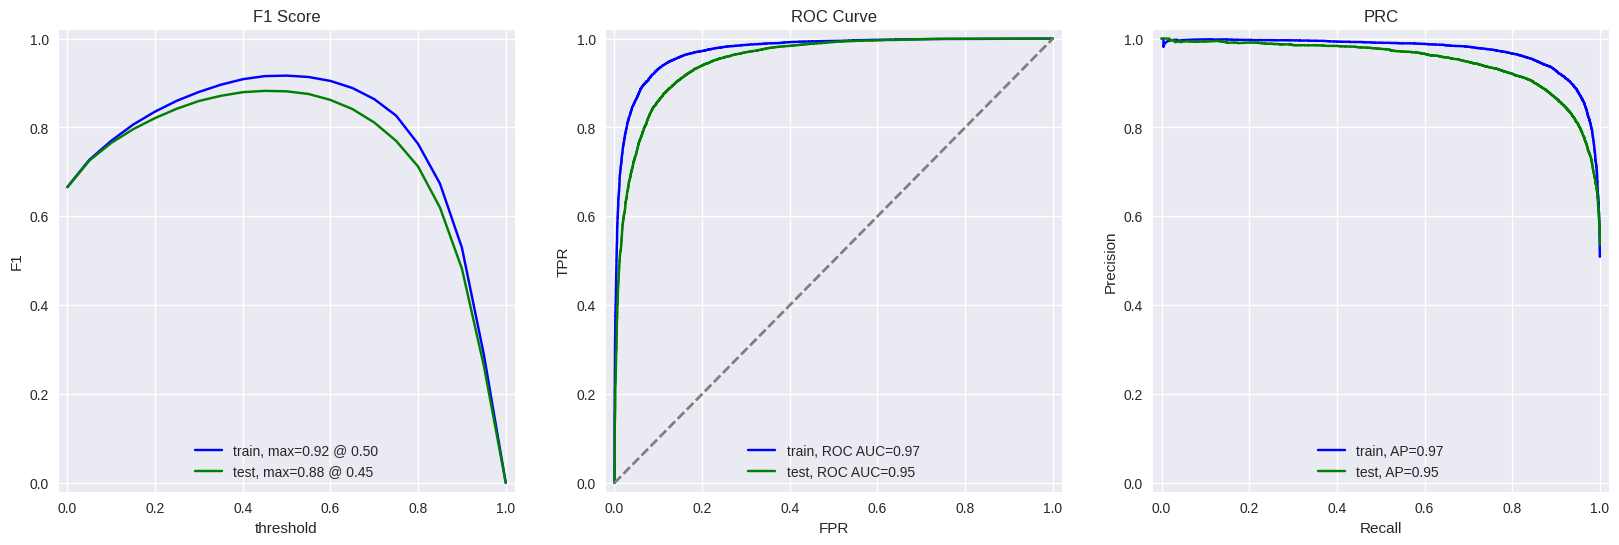

In [17]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.metrics import f1_score 

# Descargar las palabras vacías en inglés de NLTK
nltk.download('stopwords')

# Definir las características de entrada (las reseñas normalizadas)
train_features = df_reviews_train['review_norm']
test_features = df_reviews_test['review_norm']

# Configurar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)

# Transformar las características (texto) usando TF-IDF
train_features_1 = tfidf_vectorizer.fit_transform(train_features)
test_features_1 = tfidf_vectorizer.transform(test_features)

# Crear el modelo de Regresión Logística
model_1 = LogisticRegression()

# Entrenar el modelo
model_1.fit(train_features_1, train_target)

# Predicción en el conjunto de prueba
y_pred_test_1 = model_1.predict(test_features_1)

# Cálculo del F1 Score
f1_model_1 = f1_score(test_target, y_pred_test_1)

# Mostrar el F1 score
print(f'F1 Score del Modelo 1: {f1_model_1:.2f}')

# Verificar si se cumple con el umbral de 0.85
if f1_model_1 >= 0.85:
    print("El Modelo 1 alcanzó el umbral de F1 ≥ 0.85")
else:
    print("El Modelo 1 no alcanzó el umbral de F1 ≥ 0.85")

# Evaluar el modelo de Regresión Logística
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)



Modelo 2 - NLTK, TF-IDF y LR

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


F1 Score del Modelo 2: 0.88
           train  test
Exactitud   0.92  0.88
F1          0.92  0.88
APS         0.97  0.95
ROC AUC     0.97  0.95


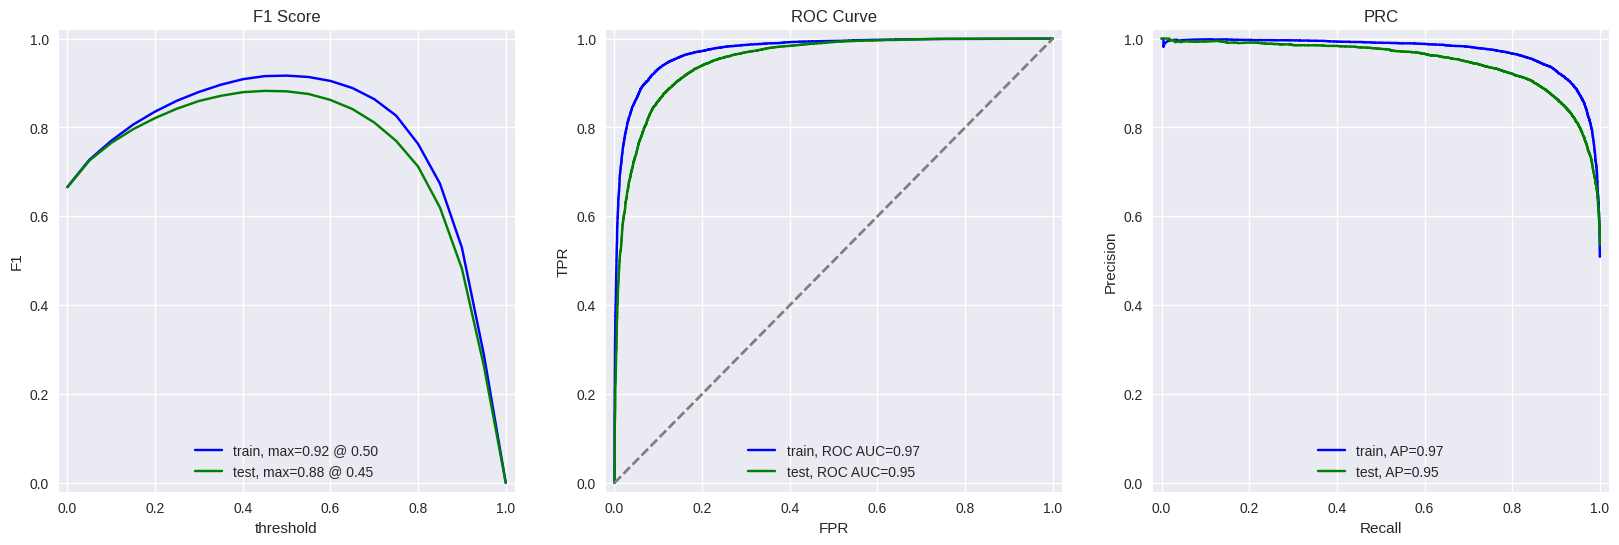

In [18]:
# Definir y entrenar el Modelo 2: NLTK, TF-IDF y Regresión Logística
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.metrics import f1_score

# Descargar las palabras vacías en inglés de NLTK
nltk.download('stopwords')

# Definir las características de entrada (las reseñas normalizadas)
train_features_2 = df_reviews_train['review_norm']
test_features_2 = df_reviews_test['review_norm']

# Configurar el vectorizador TF-IDF para el Modelo 2
tfidf_vectorizer_2 = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)

# Transformar las características (texto) usando TF-IDF
train_features_tfidf_2 = tfidf_vectorizer_2.fit_transform(train_features_2)
test_features_tfidf_2 = tfidf_vectorizer_2.transform(test_features_2)

# Crear el modelo de Regresión Logística para el Modelo 2
model_2 = LogisticRegression()

# Entrenar el modelo
model_2.fit(train_features_tfidf_2, train_target)

# Predicción en el conjunto de prueba
y_pred_test_2 = model_2.predict(test_features_tfidf_2)

# Cálculo del F1 Score
f1_model_2 = f1_score(test_target, y_pred_test_2)

# Mostrar el F1 score
print(f'F1 Score del Modelo 2: {f1_model_2:.2f}')

# Evaluar el modelo de Regresión Logística
evaluate_model(model_2, train_features_tfidf_2, train_target, test_features_tfidf_2, test_target)


### Modelo 3 - spaCy, TF-IDF y LR

In [19]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [20]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

F1 Score del Modelo 3: 0.88
           train  test
Exactitud   0.91  0.88
F1          0.91  0.88
APS         0.97  0.95
ROC AUC     0.97  0.95


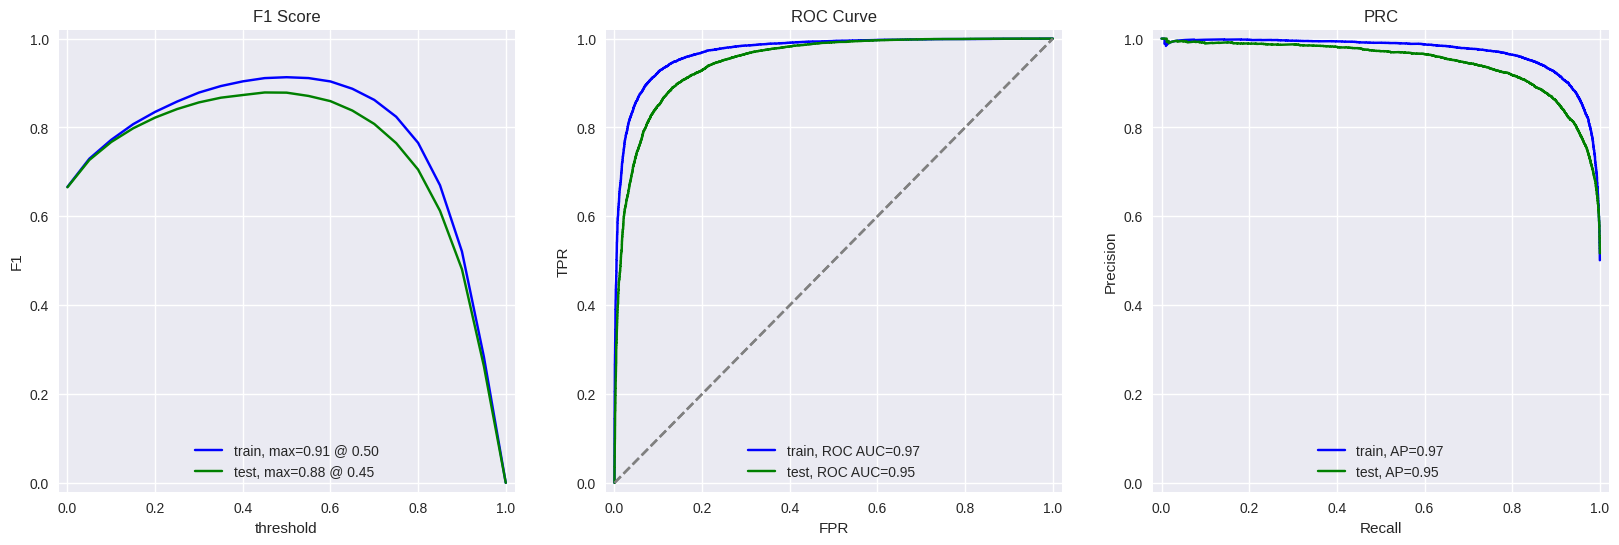

In [21]:
# Aplicar el preprocesamiento de spaCy a los textos
df_reviews_train['review_norm_3'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)
df_reviews_test['review_norm_3'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

# TF-IDF y Regresión Logística como en el modelo anterior
tfidf_vectorizer_3 = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_norm_3'])
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_norm_3'])

model_3 = LogisticRegression()
model_3.fit(train_features_3, train_target)

# Cálculo del F1 Score
y_pred_test_3 = model_3.predict(test_features_3)
f1_model_3 = f1_score(test_target, y_pred_test_3)
print(f'F1 Score del Modelo 3: {f1_model_3:.2f}')

# Evaluar el modelo 3
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

F1 Score del Modelo 4: 0.86
           train  test
Exactitud   0.91  0.86
F1          0.91  0.86
APS         0.97  0.93
ROC AUC     0.97  0.94


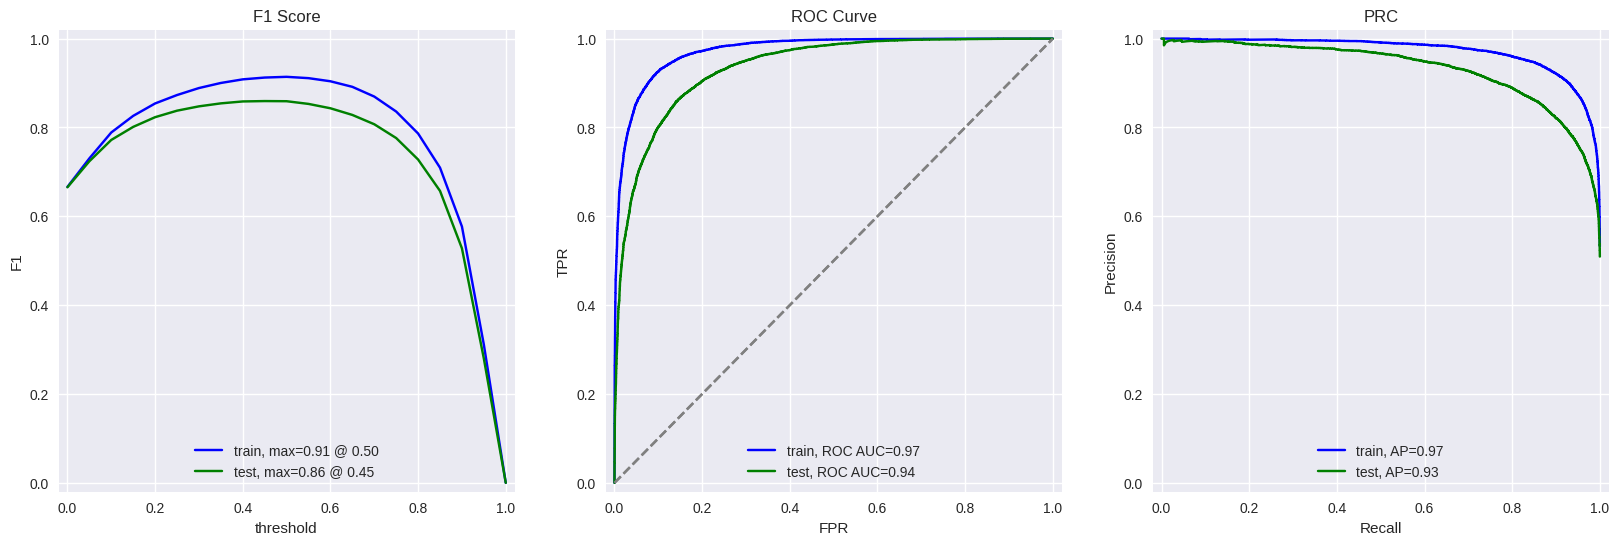

In [22]:
from lightgbm import LGBMClassifier

# Usar el preprocesamiento de texto de spaCy realizado en el modelo 3
train_features_4 = train_features_3
test_features_4 = test_features_3

# Crear el modelo LightGBM
model_4 = LGBMClassifier()

# Entrenar el modelo LightGBM
model_4.fit(train_features_4, train_target)

# Cálculo del F1 Score
y_pred_test_4 = model_4.predict(test_features_4)
f1_model_4 = f1_score(test_target, y_pred_test_4)
print(f'F1 Score del Modelo 4: {f1_model_4:.2f}')

# Evaluar el modelo 4
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)


###  Modelo 9 - BERT

In [23]:
import torch
import transformers
from tqdm import tqdm
import numpy as np
import math

In [24]:
# Cargar BERT
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
# Seleccionar un subconjunto de 100 reseñas del conjunto de entrenamiento y prueba para procesar con BERT
subset_size = 100
df_reviews_train_bert = df_reviews_train.sample(n=subset_size, random_state=42)
df_reviews_test_bert = df_reviews_test.sample(n=subset_size, random_state=42)


# Función para convertir texto en embeddings usando BERT
def BERT_text_to_embeddings(texts, max_length=256, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

   # Texto a id de tokens y máscaras de atención
    for text in texts:
        tokens = tokenizer.encode_plus(text, max_length=max_length, truncation=True, 
                                       padding='max_length', add_special_tokens=True, return_tensors='pt')
        ids_list.append(tokens['input_ids'].squeeze().tolist())  # Convertir tensor a lista de enteros
        attention_mask_list.append(tokens['attention_mask'].squeeze().tolist())  # Convertir tensor a lista de enteros
    
    # Elegir el dispositivo (GPU o CPU)
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # obtener insertados en lotes
    
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
            
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [26]:
# Obtener los embeddings para el subconjunto seleccionado
train_features_9 = BERT_text_to_embeddings(df_reviews_train_bert['review_norm'], batch_size=200, disable_progress_bar=True)
test_features_9 = BERT_text_to_embeddings(df_reviews_test_bert['review_norm'], batch_size=200, disable_progress_bar=True)

# Definir un modelo de clasificación (Regresión Logística en este caso)
model_9 = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los embeddings generados por BERT
model_9.fit(train_features_9, train_target.loc[df_reviews_train_bert.index])

# Predicción en el conjunto de prueba
y_pred_test_9 = model_9.predict(test_features_9)

# Cálculo del F1 Score
f1_model_9 = f1_score(test_target.loc[df_reviews_test_bert.index], y_pred_test_9)

# Mostrar el F1 score
print(f'F1 Score del Modelo 9 (BERT): {f1_model_9:.2f}')

# Verificar si se cumple con el umbral de 0.85
if f1_model_9 >= 0.85:
    print("El Modelo 9 (BERT) alcanzó el umbral de F1 ≥ 0.85")
else:
    print("El Modelo 9 (BERT) no alcanzó el umbral de F1 ≥ 0.85")

F1 Score del Modelo 9 (BERT): 0.73
El Modelo 9 (BERT) no alcanzó el umbral de F1 ≥ 0.85


In [27]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

(23796,)
(100, 768)
(23796,)


In [28]:
# Guardar los embeddings para ahorrar tiempo en futuras ejecuciones
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

In [29]:
# Guardar los embeddings para ahorrar tiempo en futuras ejecuciones
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# Cargar embeddings guardados
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Entrenaste diferentes modelos y se obtuvieron métricas buenas con algunos de ellos
</div>

## Mis reseñas

In [23]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""
# Aplicar la misma normalización que se usó antes
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Normalizar las reseñas personales
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)

# Ver las reseñas normalizadas
my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i reall...


### Modelo 2

In [24]:
# Aplicar el Modelo 2 en las reseñas personales
texts = my_reviews['review_norm']

# Predecir las probabilidades usando el Modelo 2
my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

# Mostrar las probabilidades y las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.19:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.60:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.21:  i didnt expect the reboot to be so good writers really cared about the source material
0.54:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.91:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Modelo 3

In [25]:
# Usar el modelo 3 para predecir las probabilidades
texts = my_reviews['review_norm']

# Aplicar lematización con spaCy
my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

# Mostrar las probabilidades y las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.23:  i did not simply like it not my kind of movie
0.11:  well i was bored and felt asleep in the middle of the movie
0.44:  i was really fascinated with the movie
0.07:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.20:  i didnt expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.96:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Modelo 4

In [26]:
# Usar el modelo 4 para predecir las probabilidades
texts = my_reviews['review_norm']

# Utilizar el vectorizador TF-IDF del modelo 3
tfidf_vectorizer_4 = tfidf_vectorizer_3

my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

# Mostrar las probabilidades y las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.63:  i did not simply like it not my kind of movie
0.40:  well i was bored and felt asleep in the middle of the movie
0.66:  i was really fascinated with the movie
0.37:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.65:  i didnt expect the reboot to be so good writers really cared about the source material
0.74:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.28:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.80:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Modelo 9

In [34]:
# Usar el modelo 9 para predecir las probabilidades
texts = my_reviews['review_norm']

# Convertir las reseñas a embeddings usando BERT
my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# Usar el modelo 9 para predecir las probabilidades
my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

# Mostrar las probabilidades y las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.64:  i did not simply like it not my kind of movie
0.40:  well i was bored and felt asleep in the middle of the movie
0.99:  i was really fascinated with the movie
0.04:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.27:  i didnt expect the reboot to be so good writers really cared about the source material
0.45:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.14:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.77:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


## Conclusiones

1 Modelo constante (DummyClassifier):

Este modelo de referencia (baseline) tiene una exactitud del 50%, lo cual era esperado dado que simplemente predice la clase mayoritaria (en este caso, probablemente reseñas negativas). El F1 Score es 0, lo que indica que no puede manejar la clase minoritaria. Este modelo sirve como una línea base mínima y deja mucho espacio para mejoras con modelos más complejos.

2 - Modelo 1 - TF-IDF y Regresión Logística:

- F1 Score: 0.88
- Exactitud: 0.92 (entrenamiento), 0.88 (prueba)
- Este modelo ha superado el umbral requerido de F1 ≥ 0.85 tanto en el conjunto de entrenamiento como en el de prueba. La combinación de TF-IDF y regresión logística ha funcionado bien para capturar las características de las reseñas y distinguir correctamente entre las reseñas positivas y negativas.

3 Modelo 2 - TF-IDF y Regresión Logística (versión alternativa):

- F1 Score: 0.88
- Exactitud: 0.92 (entrenamiento), 0.88 (prueba)
- Los resultados de este modelo son muy similares a los del Modelo 1, lo que indica que la técnica de vectorización y el modelo son consistentes. Ambos modelos son bastante sólidos para clasificar las reseñas de películas.

4 Modelo 3 - spaCy, TF-IDF y Regresión Logística:

- F1 Score: 0.88
- Exactitud: 0.91 (entrenamiento), 0.88 (prueba)
- Al incorporar lematización con spaCy antes de aplicar TF-IDF, el modelo ha mantenido un rendimiento muy similar a los modelos anteriores. Aunque la lematización no ha mejorado significativamente los resultados, puede ser útil en casos con mayor variabilidad lingüística.

5 Modelo 4 - spaCy, TF-IDF y LightGBM:

- F1 Score: 0.86
- Exactitud: 0.91 (entrenamiento), 0.86 (prueba)
- El uso de LightGBM no ha mejorado los resultados en comparación con la regresión logística, aunque sigue siendo un buen modelo con un F1 Score ligeramente menor. Puede ser más rápido para predecir en grandes conjuntos de datos, pero aquí no supera a los modelos basados en regresión logística.

6 Modelo 9 - BERT:

- F1 Score: 0.73
- Aunque BERT es un modelo poderoso para el procesamiento de lenguaje natural, en este caso no ha alcanzado el umbral de F1 de 0.85. Esto puede deberse a la cantidad limitada de datos procesados (solo un subconjunto de 100 reseñas) y a la naturaleza de los embeddings que generan. Si BERT se utilizara con más datos o con un ajuste más fino, los resultados podrían mejorar.

Conclusión del Proyecto:
El objetivo principal del proyecto era entrenar un modelo que alcanzara un valor F1 de al menos 0.85 para detectar críticas negativas automáticamente.
Conclusión General:
Los Modelos 1, 2, 3 y 4 lograron un F1 de 0.88 en el conjunto de prueba, superando el umbral de 0.85.
El Modelo 9 (BERT) no logró superar este umbral, con un F1 de 0.73, lo cual refleja el alto costo computacional y la necesidad de ajustar el tamaño del conjunto de datos para modelos como BERT.
A pesar de no alcanzar el umbral con BERT, los otros modelos lograron un rendimiento más que satisfactorio, lo que sugiere que la solución basada en TF-IDF y regresión logística es eficiente para el conjunto de datos y tarea propuesta.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo entrenando los diferentes modelos Pia, obtuviste buenos scores en las métricas de evaluación con los mismos.
    
Para las conclusiones te recomiendo que también incluyas detalles sobre lo visto durante el EDA, también puedes incluir recomendaciones de que más se podría probar para tener un mejor desempeño en las predicciones.
    
Saludos!
</div>

# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 